In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])


Exercise 1: Calculate the mean, median, and mode of the sepal lengths in the Iris dataset.

In [2]:

sepal_length = data['sepal length (cm)']
sepal_length.mean()



5.843333333333334

In [3]:
sepal_length.median()

5.8

In [4]:
sepal_length.mode()[0]

5.0

Exercise 2: Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [5]:
petal_width=data['petal width (cm)']

In [6]:
petal_width.var()

0.5810062639821029

In [8]:
petal_width.std()

0.7622376689603465

Exercise 3: Create a summary table that includes the mean, median, variance, and standard deviation for all numerical features in the dataset.

In [9]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Exercise 4: Define a random variable for the sepal length and calculate the probability distribution of sepal lengths.

In [10]:
sepal_length = data['sepal length (cm)']


sepal_length.value_counts(normalize=True).sort_index()

sepal length (cm)
4.3    0.006667
4.4    0.020000
4.5    0.006667
4.6    0.026667
4.7    0.013333
4.8    0.033333
4.9    0.040000
5.0    0.066667
5.1    0.060000
5.2    0.026667
5.3    0.006667
5.4    0.040000
5.5    0.046667
5.6    0.040000
5.7    0.053333
5.8    0.046667
5.9    0.020000
6.0    0.040000
6.1    0.040000
6.2    0.026667
6.3    0.060000
6.4    0.046667
6.5    0.033333
6.6    0.013333
6.7    0.053333
6.8    0.020000
6.9    0.026667
7.0    0.006667
7.1    0.006667
7.2    0.020000
7.3    0.006667
7.4    0.006667
7.6    0.006667
7.7    0.026667
7.9    0.006667
Name: proportion, dtype: float64

Exercise 5: Plot the probability distribution of sepal lengths using a histogram.

(array([9., 0., 0., 2., 0., 0., 4., 0., 0., 0., 5., 0., 0., 2., 0., 0., 5.,
        0., 0., 0., 3., 0., 0., 2., 0., 0., 2., 0., 0., 1.]),
 array([0.00666667, 0.00866667, 0.01066667, 0.01266667, 0.01466667,
        0.01666667, 0.01866667, 0.02066667, 0.02266667, 0.02466667,
        0.02666667, 0.02866667, 0.03066667, 0.03266667, 0.03466667,
        0.03666667, 0.03866667, 0.04066667, 0.04266667, 0.04466667,
        0.04666667, 0.04866667, 0.05066667, 0.05266667, 0.05466667,
        0.05666667, 0.05866667, 0.06066667, 0.06266667, 0.06466667,
        0.06666667]),
 <BarContainer object of 30 artists>)

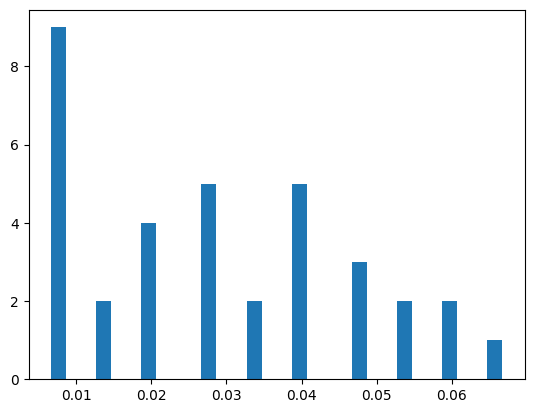

In [12]:
plt.hist(sepal_length.value_counts(normalize=True).sort_index(),bins=30)

Exercise 6: Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

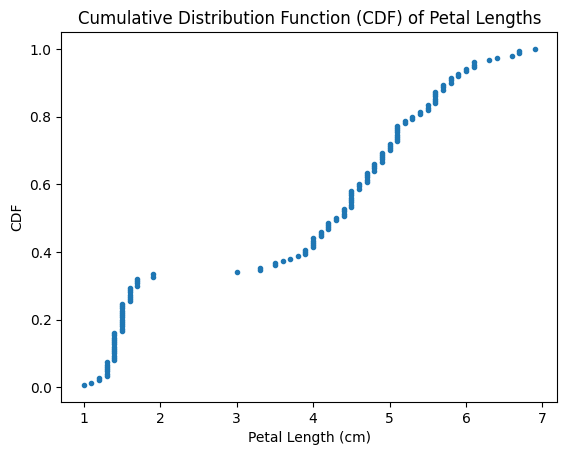

In [13]:
petal_length = data['petal length (cm)']


petal_length_sorted = np.sort(petal_length)
cdf = np.arange(1, len(petal_length_sorted) + 1) / len(petal_length_sorted)



plt.plot(petal_length_sorted, cdf, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) of Petal Lengths')
plt.xlabel('Petal Length (cm)')
plt.ylabel('CDF')
plt.show()


Exercise 7: Calculate and plot the probability density function (PDF) for sepal width.

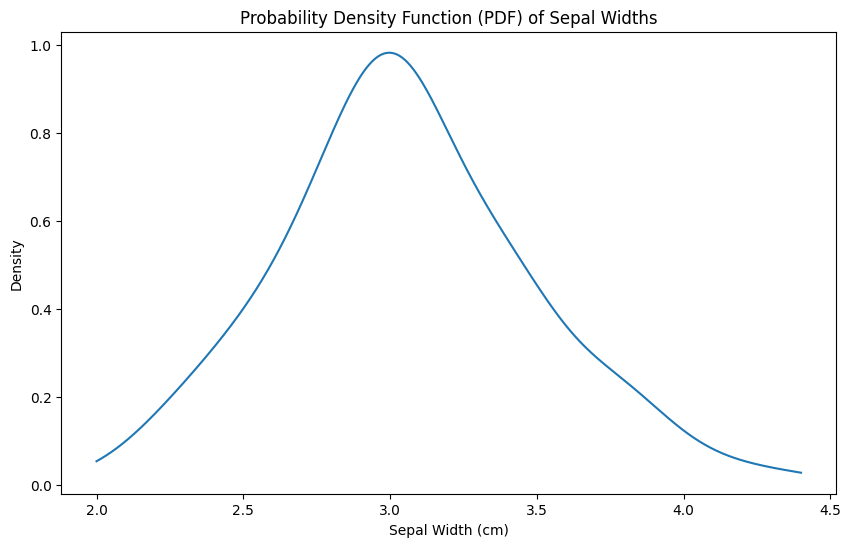

In [14]:
sepal_width = data['sepal width (cm)']


pdf = stats.gaussian_kde(sepal_width)

x = np.linspace(min(sepal_width), max(sepal_width), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, pdf(x))
plt.title('Probability Density Function (PDF) of Sepal Widths')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.show()


Exercise 8: Determine the probability of a randomly selected iris flower having a petal length greater than a given value.

In [16]:
value = 4.5

probability = np.mean(petal_length > value)

print(f"The probability of a randomly selected iris flower having a petal length greater than {value} cm is {probability:.2f}")


The probability of a randomly selected iris flower having a petal length greater than 4.5 cm is 0.42


Exercise 9: Perform a hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers.

In [17]:
setosa = data[data['target'] == 0]['petal length (cm)']
versicolor = data[data['target'] == 1]['petal length (cm)']


t_stat, p_value = stats.ttest_ind(setosa, versicolor)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -39.492719391538095
P-value: 5.404910513441677e-62


Exercise 10: Calculate and interpret the covariance and correlation between sepal length and sepal width.
python

In [18]:
covariance = np.cov(data['sepal length (cm)'], data['sepal width (cm)'])[0, 1]
correlation = np.corrcoef(data['sepal length (cm)'], data['sepal width (cm)'])[0, 1]

print("Covariance between Sepal Length and Sepal Width:", covariance)
print("Correlation between Sepal Length and Sepal Width:", correlation)


Covariance between Sepal Length and Sepal Width: -0.042434004474272924
Correlation between Sepal Length and Sepal Width: -0.11756978413300208
